In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/dados_campanha_vest - dados_campanha_vest (1).csv')

In [ ]:
df.shape

(276, 12)

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Tipo de campanha  276 non-null    object
 1   Sexo              276 non-null    object
 2   Idade             276 non-null    object
 3   Dispositivo       276 non-null    object
 4   Cliques           276 non-null    int64 
 5   Impr.             276 non-null    int64 
 6   Conversões        276 non-null    object
 7   Código da moeda   276 non-null    object
 8   Custo             276 non-null    object
 9   CPL               276 non-null    object
 10  CTR               276 non-null    object
 11  CPC méd.          276 non-null    object
dtypes: int64(2), object(10)
memory usage: 26.0+ KB
None
Tipo de campanha    0
Sexo                0
Idade               0
Dispositivo         0
Cliques             0
Impr.               0
Conversões          0
Código da moeda     0
Custo             

In [ ]:
print("Colunas encontradas no CSV:")
print(df.columns)

Colunas encontradas no CSV:
Index(['Tipo de campanha', 'Sexo', 'Idade', 'Dispositivo', 'Cliques', 'Impr.',
       'Conversões', 'Código da moeda', 'Custo', 'CPL', 'CTR', 'CPC méd.'],
      dtype='object')


In [ ]:
df = df.rename(columns=lambda x: x.strip())

In [ ]:
print(df)

       Tipo de campanha          Sexo         Idade   Dispositivo  Cliques  \
0              Pesquisa  Desconhecida  Desconhecida     Celulares    52795   
1              Pesquisa      Feminino       18 a 24     Celulares    13144   
2              Pesquisa      Feminino       25 a 34     Celulares     8948   
3              Pesquisa  Desconhecida  Desconhecida  Computadores     6242   
4              Pesquisa     Masculino       18 a 24     Celulares     6280   
..                  ...           ...           ...           ...      ...   
271             Display  Desconhecida           +65     Celulares        1   
272  Geração de demanda     Masculino  Desconhecida   Telas de TV        1   
273  Geração de demanda  Desconhecida       55 a 64  Computadores        0   
274  Geração de demanda  Desconhecida       35 a 44       Tablets        0   
275  Geração de demanda  Desconhecida       55 a 64       Tablets        0   

      Impr. Conversões Código da moeda     Custo    CPL     CTR

In [ ]:
df = df.rename(columns={
    'Custo': 'investimento',
    'CPL': 'cpl',
    'Cliques': 'cliques',
    'Impr.': 'impressoes',
    'CPC méd.': 'cpc_medio',
    'CTR': 'ctr',
    'Conversões': 'leads',
    'Sexo': 'sexo',
    'Dispositivo': 'dispositivo',
    'Idade': 'idade',
    'Tipo de campanha': 'tipo_de_campanha'
})

In [ ]:
print("Colunas após renomear:")
print(df.columns)

Colunas após renomear:
Index(['tipo_de_campanha', 'sexo', 'idade', 'dispositivo', 'cliques',
       'impressoes', 'leads', 'Código da moeda', 'investimento', 'cpl', 'ctr',
       'cpc_medio'],
      dtype='object')


In [ ]:
colunas_necessarias = ['investimento', 'ctr', 'cpl', 'taxa_conv', 'cliques',
                       'impressoes', 'cpc_medio', 'leads', 'sexo', 'dispositivo',
                       'idade', 'tipo_de_campanha']

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sexo', 'dispositivo', 'idade', 'tipo_de_campanha'], drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

In [ ]:
# Converter vírgulas para ponto e transformar em float
colunas_numericas = ['investimento', 'ctr', 'cpl','cliques', 'impressoes', 'cpc_medio', 'leads']

In [ ]:
colunas_numericas = ['investimento', 'ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio', 'leads']


In [ ]:
df_encoded = pd.get_dummies(df, columns=['sexo', 'dispositivo', 'idade', 'tipo_de_campanha'], drop_first=True)


In [ ]:
X = df_encoded[['investimento', 'ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio'] + [col for col in df_encoded.columns if any(cat in col for cat in ['sexo_', 'dispositivo_', 'idade_', 'tipo_de_campanha_'])]]

In [ ]:
y = df_encoded['leads']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error


In [ ]:
import numpy as np

y = np.nan_to_num(y, nan=0)


In [ ]:
df = df.fillna(0)


In [ ]:
for col in colunas_para_converter_para_float:
    if col in df.columns: # Garante que a coluna existe
        # 1. Converte para string para usar métodos .str
        # 2. Remove o símbolo de porcentagem, se houver
        # 3. Remove o separador de milhares (ponto '.')
        # 4. Converte a vírgula ',' para ponto '.' (separador decimal padrão do Python)
        # 5. Remove espaços em branco extras
        df[col] = (
            df[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .str.replace('.', '', regex=False)
            .str.replace(',', '.', regex=False)
            .str.strip()
        )

In [ ]:
print("Tamanho de y_test original:", len(y_test_imputed))
print("Quantos NaNs em y_test:", np.isnan(y_test_imputed).sum())
print("Quantos valores válidos em y_test:", np.sum(~np.isnan(y_test_imputed)))

Tamanho de y_test original: 56
Quantos NaNs em y_test: 0
Quantos valores válidos em y_test: 56


--- Matriz de Correlação com 'leads' (Variáveis Numéricas) ---
leads           1.000000
impressoes      0.517482
investimento    0.435062
cliques         0.319267
ctr             0.053138
cpl            -0.032766
cpc_medio      -0.042428
Name: leads, dtype: float64


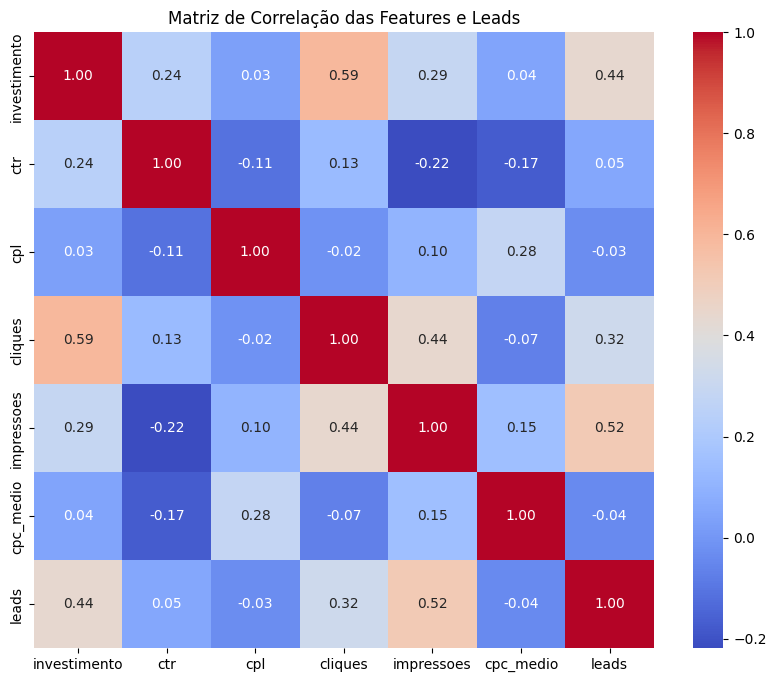

In [ ]:
# X e y para calcular a correlação facilmente
df_para_correlacao = pd.concat([X_train_imputed, y_train], axis=1) # Usando os dados de treino limpos

print("--- Matriz de Correlação com 'leads' (Variáveis Numéricas) ---")
# Calcule a correlação de todas as colunas numéricas com 'leads'
correlacoes_com_leads = df_para_correlacao.corr()['leads'].sort_values(ascending=False)
print(correlacoes_com_leads)

# Opcional: Visualizar a matriz de correlação completa com um mapa de calor
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df_para_correlacao.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação das Features e Leads")
plt.show()

In [ ]:
# Use o df_final_para_analise que já tem as colunas categóricas originais
# e os leads reais.

print("\n--- Média de Leads por 'Sexo' ---")
print(df_final_para_analise.groupby('sexo')['leads'].mean().round(2))

print("\n--- Média de Leads por 'Tipo de Campanha' ---")
print(df_final_para_analise.groupby('tipo_de_campanha')['leads'].mean().round(2))

print("\n--- Média de Leads por 'Dispositivo' ---")
print(df_final_para_analise.groupby('dispositivo')['leads'].mean().round(2))

# Faça isso para todas as suas colunas categóricas.


--- Média de Leads por 'Sexo' ---
sexo
Desconhecida    1322.67
Feminino         918.81
Masculino        615.72
Name: leads, dtype: float64

--- Média de Leads por 'Tipo de Campanha' ---
tipo_de_campanha
Display                 51.42
Geração de demanda     167.64
Pesquisa              1724.60
Pmax                  1607.32
Name: leads, dtype: float64

--- Média de Leads por 'Dispositivo' ---
dispositivo
Celulares       2703.18
Computadores     385.86
Outros             1.12
Tablets           38.39
Telas de TV       15.47
Name: leads, dtype: float64



--- Importância das Features (XGBoost) ---
impressoes      0.742205
investimento    0.136504
cliques         0.090480
cpl             0.028968
cpc_medio       0.001136
ctr             0.000708
dtype: float32


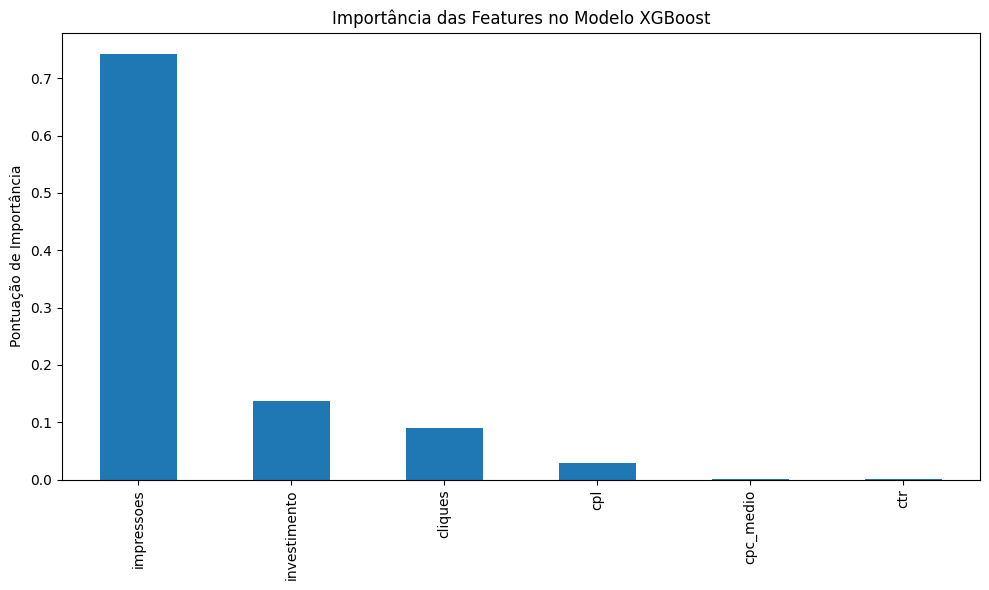

In [ ]:
# Após treinar o modelo_xgb_otimizado (se você usou GridSearchCV) ou modelo_xgb
# Você precisa ter X_train_imputed e y_train do seu último passo correto.

# Treine o modelo XGBoost novamente (se ainda não o fez no código corrigido)
modelo_xgb = xgb.XGBRegressor(random_state=42, n_estimators=100)
modelo_xgb.fit(X_train_imputed, y_train)

print("\n--- Importância das Features (XGBoost) ---")
feature_importances = pd.Series(modelo_xgb.feature_importances_, index=X_train_imputed.columns)
print(feature_importances.sort_values(ascending=False))

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Importância das Features no Modelo XGBoost")
plt.ylabel("Pontuação de Importância")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_imputed),
                               columns=X_train_imputed.columns,
                               index=X_train_imputed.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test_imputed),
                              columns=X_test_imputed.columns,
                              index=X_test_imputed.index)

# Agora treine seus modelos com X_train_scaled e X_test_scaled
# Exemplo:
modelo_lr_scaled = LinearRegression()
modelo_lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = modelo_lr_scaled.predict(X_test_scaled)
r2_lr_scaled = r2_score(y_test, y_pred_lr_scaled)
rmse_lr_scaled = np.sqrt(mean_squared_error(y_test, y_pred_lr_scaled))
print(f"\nRegressão Linear (escalada) - R²: {r2_lr_scaled:.4f}, RMSE: {rmse_lr_scaled:.2f}")

# E o XGBoost também pode se beneficiar ligeiramente ou ter otimização mais rápida com dados escalados
modelo_xgb_scaled = xgb.XGBRegressor(random_state=42, n_estimators=100) # Use os melhores params se já tiver feito tuning
modelo_xgb_scaled.fit(X_train_scaled, y_train)
y_pred_xgb_scaled = modelo_xgb_scaled.predict(X_test_scaled)
r2_xgb_scaled = r2_score(y_test, y_pred_xgb_scaled)
rmse_xgb_scaled = np.sqrt(mean_squared_error(y_test, y_pred_xgb_scaled))
print(f"XGBoost (escalado) - R²: {r2_xgb_scaled:.4f}, RMSE: {rmse_xgb_scaled:.2f}")


Regressão Linear (escalada) - R²: 0.8836, RMSE: 1338.25
XGBoost (escalado) - R²: 0.8664, RMSE: 1433.88


NaNs em 'leads' antes de remover linhas: 0
NaNs em 'leads' depois de remover linhas: 0

--- Verificação de NaNs FINAIS antes do treinamento ---
NaNs em X_train_imputed (total): 0
NaNs em X_test_imputed (total): 0
NaNs em y_train (total): 0
NaNs em y_test (total): 0

🔎 Avaliação do Modelo de Regressão Linear:

📈 R²: 0.8836, RMSE: 1338.25

🔎 Avaliação do Modelo XGBoost:

🌲 R²: 0.8664, RMSE: 1433.88

📊 Comparativo por sexo (leads reais vs previstos):


,leads,pred_lr,pred_xgb
sexo,,,
Desconhecida,103168,36785.3,103137.898438
Feminino,91881,113390.4,86463.203125
Masculino,60341,100294.0,60349.398438


/tmp/ipython-input-355-2794090511.py:133: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


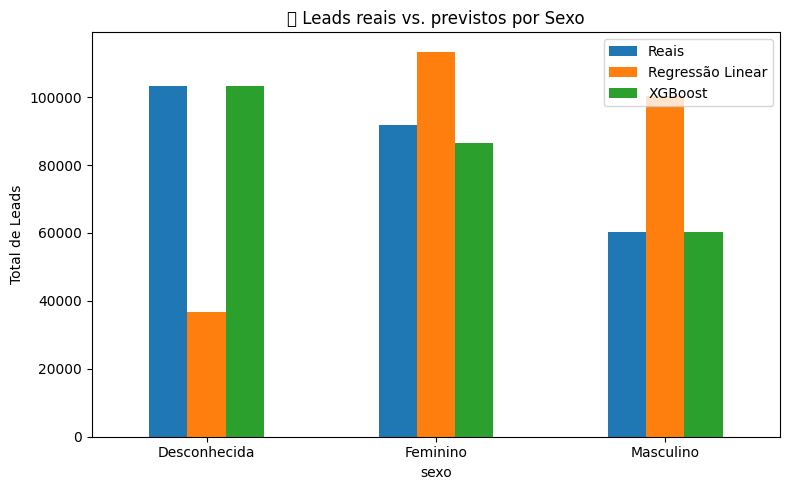


📊 Comparativo por tipo de campanha (leads reais vs previstos):


,leads,pred_lr,pred_xgb
tipo_de_campanha,,,
Display,2314,3388.2,2316.600098
Geração de demanda,14585,18611.7,14578.200195
Pesquisa,103476,87854.5,98052.796875
Pmax,135015,140615.2,135002.906250


/tmp/ipython-input-355-2794090511.py:145: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


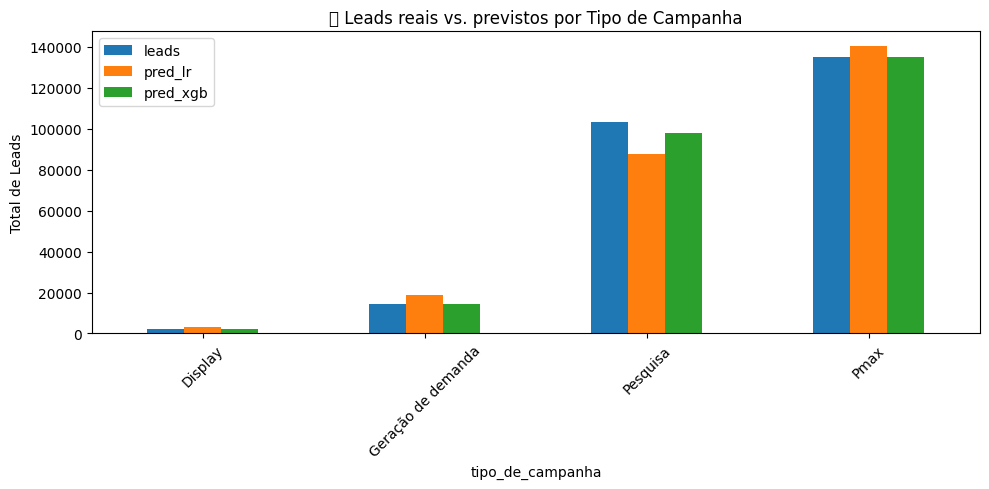

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Suponha que 'df' é o seu DataFrame carregado do arquivo original.

# --- PASSO 1: LIMPEZA E CONVERSÃO DE TIPOS NO DATAFRAME ORIGINAL (df) ---
# Este bloco deve vir logo após o carregamento do seu DataFrame 'df'.

# 1.1. Conversão de colunas numéricas para float, tratando formatação e NaNs/infinitos
colunas_para_converter_para_float = [
    'investimento', 'ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio', 'leads'
    # Adicione 'idade' aqui se ela deve ser numérica
]

for col in colunas_para_converter_para_float:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace('%', '', regex=False)
            .str.replace('.', '', regex=False) # Remove separador de milhares
            .str.replace(',', '.', regex=False) # Converte vírgula decimal para ponto
            .str.strip()
        )
        df[col] = df[col].replace('', np.nan) # Converte strings vazias para NaN
        df[col] = pd.to_numeric(df[col], errors='coerce') # Converte para float, erro vira NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan) # Garante que infinitos viram NaN

# 1.2. Tratar NaNs na variável alvo ('leads') removendo as linhas do df
print(f"NaNs em 'leads' antes de remover linhas: {df['leads'].isnull().sum()}")
df.dropna(subset=['leads'], inplace=True) # Remove linhas onde 'leads' é NaN
print(f"NaNs em 'leads' depois de remover linhas: {df['leads'].isnull().sum()}")

# --- PASSO 2: CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS (One-Hot Encoding) ---
# Faça isso no DataFrame 'df' já limpo.
colunas_categoricas = ['sexo', 'dispositivo', 'idade', 'tipo_de_campanha', 'Código da moeda'] # Verifique seus nomes reais
df_processed = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True) # drop_first evita multicolinearidade

# --- PASSO 3: SEPARAR FEATURES (X) E TARGET (y) ---
# Agora, X e y serão criados a partir do df_processed, que já tem tudo em float e dummies.
feature_cols = [
    'investimento', 'ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio'
]
# Adicionar as colunas dummy geradas
feature_cols.extend([col for col in df_processed.columns if any(cat in col for cat in ['sexo_', 'dispositivo_', 'idade_', 'tipo_de_campanha_', 'Código da moeda_'])])

X = df_processed[feature_cols].copy()
y = df_processed['leads'].copy()

# --- PASSO 4: DIVIDIR OS DADOS EM TREINO E TESTE ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=30)

# --- PASSO 5: IMPUTAR VALORES AUSENTES APENAS NOS CONJUNTOS DE TREINO/TESTE ---
# Este é o ponto crítico para evitar vazamento de dados.
imputer = SimpleImputer(strategy='mean')

# Identificar colunas numéricas que podem ter NaNs em X (features)
colunas_numericas_X = X.select_dtypes(include=np.number).columns

# Fit do imputer APENAS no conjunto de TREINO e Transform em ambos
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train[colunas_numericas_X]),
                               columns=colunas_numericas_X, index=X_train.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test[colunas_numericas_X]),
                              columns=colunas_numericas_X, index=X_test.index)

# Verificar NaNs finais (deve ser zero)
print("\n--- Verificação de NaNs FINAIS antes do treinamento ---")
print("NaNs em X_train_imputed (total):", X_train_imputed.isnull().sum().sum())
print("NaNs em X_test_imputed (total):", X_test_imputed.isnull().sum().sum())
print("NaNs em y_train (total):", y_train.isnull().sum())
print("NaNs em y_test (total):", y_test.isnull().sum())

# --- PASSO 6: TREINAR E AVALIAR OS MODELOS ---

# Modelo de Regressão Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train_imputed, y_train)
y_pred_lr = modelo_lr.predict(X_test_imputed)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("\n🔎 Avaliação do Modelo de Regressão Linear:\n")
print(f"📈 R²: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

# Modelo XGBoost
modelo_xgb = xgb.XGBRegressor(random_state=42, n_estimators=100)
modelo_xgb.fit(X_train_imputed, y_train)
y_pred_xgb = modelo_xgb.predict(X_test_imputed)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("\n🔎 Avaliação do Modelo XGBoost:\n")
print(f"🌲 R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.2f}")

# --- PASSO 7: RECONSTRUIR DATAFRAME PARA VISUALIZAÇÃO E ANÁLISE COMPARATIVA ---
# CUIDADO: Este bloco de reconstrução é apenas para visualização e não para treinar novamente.
# Ele recombina os dados treinados e testados para plotagem.

# Recombinar os dados de treino e teste imputados
X_completo_imputed = pd.concat([X_train_imputed, X_test_imputed], axis=0)
y_completo = pd.concat([y_train, y_test], axis=0)

# Alinhar os índices para garantir que X e y correspondem
X_completo_imputed = X_completo_imputed.sort_index()
y_completo = y_completo.sort_index()

# Criar o DataFrame final para análise, incluindo o target real
df_final_para_analise = pd.concat([X_completo_imputed, y_completo.rename('leads')], axis=1)

# Adicionar as colunas categóricas originais (não-dummy) ao DataFrame de análise para agrupamento
# Reindexamos para garantir que as linhas correspondem após as remoções de NaN em 'leads'
for cat_col in colunas_categoricas:
    df_final_para_analise[cat_col] = df[cat_col].reindex(df_final_para_analise.index)

# Adicionar previsões para todo o dataset (usando os modelos treinados)
df_final_para_analise['pred_lr'] = modelo_lr.predict(X_completo_imputed)
df_final_para_analise['pred_xgb'] = modelo_xgb.predict(X_completo_imputed)

# Agrupar e plotar por sexo
comparativo_por_sexo = df_final_para_analise.groupby('sexo')[['leads', 'pred_lr', 'pred_xgb']].sum().round(1)
print("\n📊 Comparativo por sexo (leads reais vs previstos):")
display(comparativo_por_sexo)

comparativo_por_sexo.plot(kind='bar', figsize=(8,5))
plt.title("📊 Leads reais vs. previstos por Sexo")
plt.ylabel("Total de Leads")
plt.xticks(rotation=0)
plt.legend(["Reais", "Regressão Linear", "XGBoost"])
plt.tight_layout()
plt.show()

# Agrupar e plotar por tipo de campanha
comparativo_por_tipo = df_final_para_analise.groupby('tipo_de_campanha')[['leads', 'pred_lr', 'pred_xgb']].sum().round(1)
print("\n📊 Comparativo por tipo de campanha (leads reais vs previstos):")
display(comparativo_por_tipo)

comparativo_por_tipo.plot(kind='bar', figsize=(10,5))
plt.title("📊 Leads reais vs. previstos por Tipo de Campanha")
plt.ylabel("Total de Leads")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Certifique-se de que estas variáveis estão disponíveis do seu ambiente ---
# X_train_imputed: Features de treino (imputadas e possivelmente escaladas, dependendo do seu modelo final)
# modelo_lr: Seu modelo de Regressão Linear treinado
# df: Seu DataFrame original, limpo de NaNs na coluna 'leads' e com colunas convertidas
# scaler: Seu StandardScaler treinado, SE VOCÊ APLICOU ESCALONAMENTO EM X ANTES DE TREINAR modelo_lr
# (descomente e ajuste a linha do scaler.transform(df_previsao) se usou)
# np.expm1: Se você aplicou np.log1p na sua variável 'leads' (y_train), (descomente a linha np.expm1 nas previsões)

# --- Configuração da Simulação ---
novo_investimento = 200000

# 1. Calcular as médias dos KPIs por 'tipo_de_campanha' do DataFrame original ou do X_train
# É mais preciso usar o df_processed que contém as colunas numéricas originais e a coluna categórica 'tipo_de_campanha'
# antes das dummies. Se a coluna 'tipo_de_campanha' não está em df_processed (foi dummy), use o df original.
# Vou assumir que 'df' contém as colunas originais e já está limpo.

kpi_cols = ['ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio']
# Calcular médias por tipo de campanha
kpis_medios_por_campanha = df.groupby('tipo_de_campanha')[kpi_cols].mean().to_dict('index')

# Obter as categorias únicas de 'sexo' e 'tipo_de_campanha'
sexo_categorias = sorted(df['sexo'].dropna().unique())
tipo_campanha_categorias = sorted(df['tipo_de_campanha'].dropna().unique())

resultados_simulacao = []

# --- Loop para Gerar Previsões para Cada Combinação ---
for tipo_original in tipo_campanha_categorias:
    # Obter os KPIs médios para o tipo de campanha atual
    # Se o tipo_original não estiver em kpis_medios_por_campanha (e.g., categoria com poucos dados),
    # pode-se optar por usar as médias gerais, mas idealmente, todos os tipos deveriam ter dados.
    kpis_atuais = kpis_medios_por_campanha.get(tipo_original, {})

    # Para cada sexo (dentro do tipo de campanha)
    for sexo_original in sexo_categorias:
        # Inicializar uma linha de dados para previsão com zeros, com base nas colunas do X_train_imputed
        data_row = {col: 0 for col in X_train_imputed.columns}

        # Definir o novo investimento
        data_row['investimento'] = novo_investimento

        # Preencher com os KPIs médios ESPECÍFICOS para o tipo de campanha atual
        for kpi_col in kpi_cols:
            if kpi_col in data_row and kpi_col in kpis_atuais:
                data_row[kpi_col] = kpis_atuais[kpi_col]
            elif kpi_col in data_row:
                # Fallback: Se não há KPI médio específico (raro se 'df' é completo), use a média geral
                data_row[kpi_col] = X_train_imputed[kpi_col].mean()

        # Ativar a dummy correspondente ao tipo de campanha atual
        tipo_dummy_col = f'tipo_de_campanha_{tipo_original}'
        if tipo_dummy_col in data_row:
            data_row[tipo_dummy_col] = 1
        # Se for a categoria base (que foi dropada pelo drop_first=True), suas dummies permanecerão 0.

        # Ativar a dummy correspondente ao sexo atual
        sexo_dummy_col = f'sexo_{sexo_original}'
        if sexo_dummy_col in data_row:
            data_row[sexo_dummy_col] = 1
        # O mesmo para a categoria base de sexo.

        # Criar DataFrame para previsão com a linha única
        df_previsao = pd.DataFrame([data_row])

        # Garantir que as colunas e a ordem são idênticas às de X_train_imputed
        df_previsao = df_previsao[X_train_imputed.columns]

        # --- Etapa de Escalonamento (Descomente se você aplicou StandardScaler) ---
        # Se você escalou X_train_imputed antes de treinar modelo_lr, DESCOMENTE as linhas abaixo:
        # df_previsao_final = pd.DataFrame(scaler.transform(df_previsao), columns=df_previsao.columns)
        # previsao_bruta = modelo_lr.predict(df_previsao_final)[0]

        # --- Etapa SEM Escalonamento (Use se não aplicou StandardScaler) ---
        previsao_bruta = modelo_lr.predict(df_previsao)[0]

        # --- Reverter Logaritmo (Descomente se você aplicou np.log1p em y_train) ---
        # Se você transformou 'leads' com np.log1p, DESCOMENTE a linha abaixo:
        # previsao_final = np.expm1(previsao_bruta)
        # Caso contrário:
        previsao_final = previsao_bruta

        # Arredondar e garantir que a previsão não seja negativa
        leads_previstos = max(0, round(previsao_final, 0))

        resultados_simulacao.append({
            'Tipo de Campanha': tipo_original,
            'Sexo': sexo_original,
            'Investimento (R$)': novo_investimento,
            'Leads Previstos': leads_previstos
        })

df_resultados_simulacao_especifica = pd.DataFrame(resultados_simulacao)

In [ ]:
print(f"\n--- Tabela Completa de Leads Previstos (Investimento: R$ {novo_investimento:,.2f}) ---")
print("  (Com KPIs médios específicos por Tipo de Campanha)")
display(df_resultados_simulacao_especifica)


--- Tabela Completa de Leads Previstos (Investimento: R$ 200,000.00) ---
  (Com KPIs médios específicos por Tipo de Campanha)


,Tipo de Campanha,Sexo,Investimento (R$),Leads Previstos
0,Display,Desconhecida,200000,601.0
1,Display,Feminino,200000,601.0
2,Display,Masculino,200000,601.0
3,Geração de demanda,Desconhecida,200000,552.0
4,Geração de demanda,Feminino,200000,552.0
5,Geração de demanda,Masculino,200000,552.0
6,Pesquisa,Desconhecida,200000,696.0
7,Pesquisa,Feminino,200000,696.0
8,Pesquisa,Masculino,200000,696.0
9,Pmax,Desconhecida,200000,1805.0


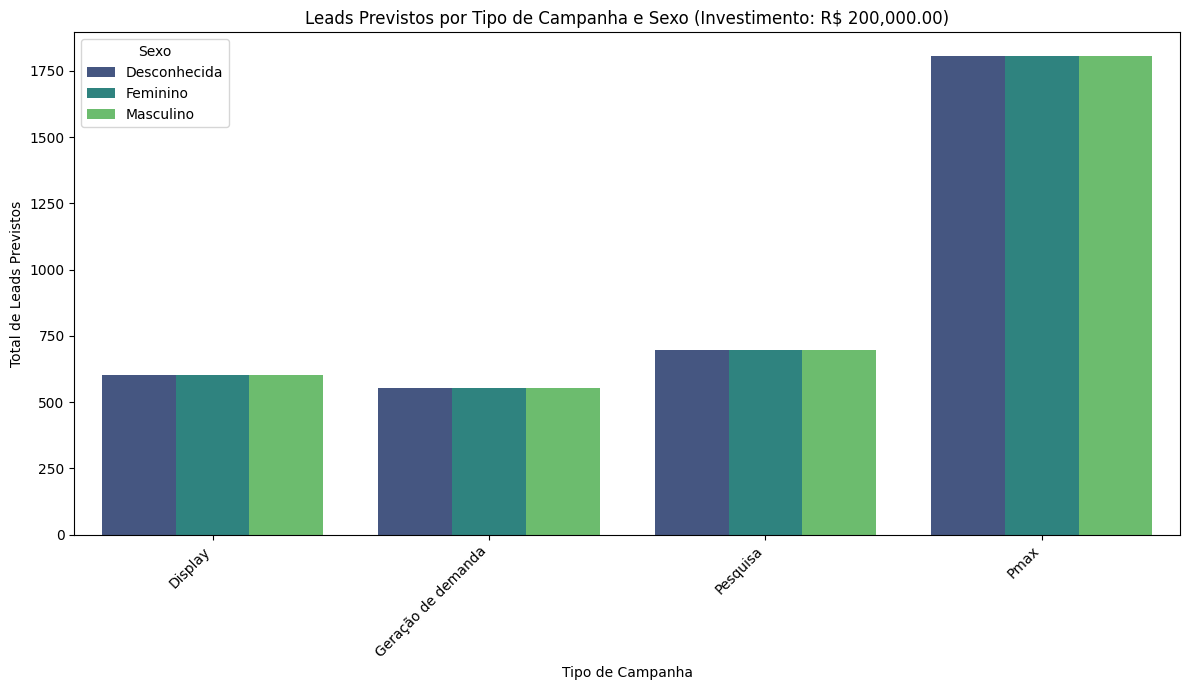

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df_resultados_simulacao_especifica, x='Tipo de Campanha', y='Leads Previstos', hue='Sexo', palette='viridis')
plt.title(f"Leads Previstos por Tipo de Campanha e Sexo (Investimento: R$ {novo_investimento:,.2f})")
plt.xlabel("Tipo de Campanha")
plt.ylabel("Total de Leads Previstos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_total_por_campanha_especifica = df_resultados_simulacao_especifica.groupby('Tipo de Campanha')['Leads Previstos'].sum().reset_index()
print(f"\n--- Total de Leads Previstos por Tipo de Campanha (Investimento: R$ {novo_investimento:,.2f}) ---")
print("  (Com KPIs médios específicos por Tipo de Campanha)")
display(df_total_por_campanha_especifica)


--- Total de Leads Previstos por Tipo de Campanha (Investimento: R$ 200,000.00) ---
  (Com KPIs médios específicos por Tipo de Campanha)


,Tipo de Campanha,Leads Previstos
0,Display,1803.0
1,Geração de demanda,1656.0
2,Pesquisa,2088.0
3,Pmax,5415.0


/tmp/ipython-input-359-1945116974.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_total_por_campanha_especifica, x='Tipo de Campanha', y='Leads Previstos', palette='coolwarm')


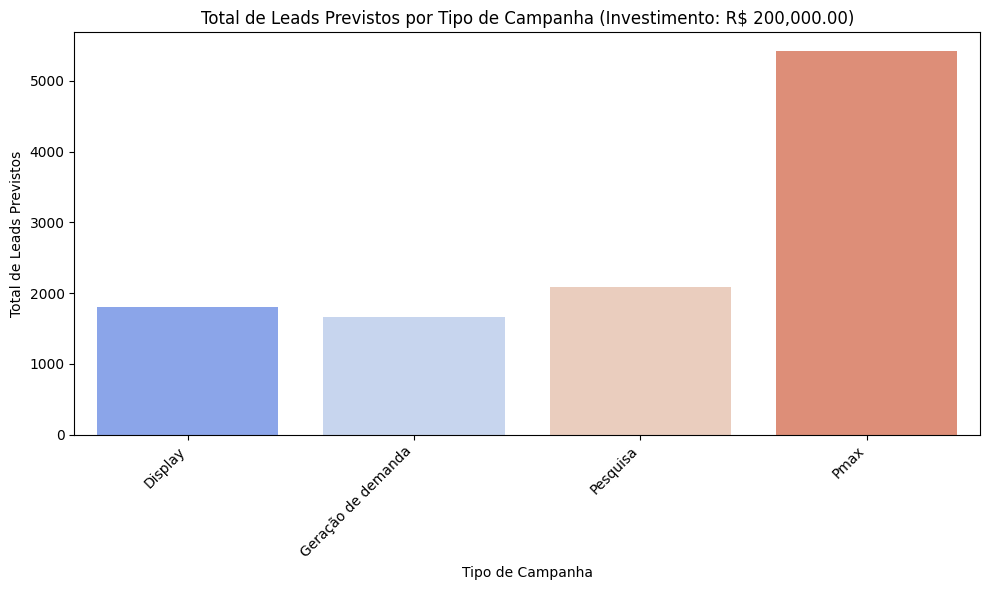

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_total_por_campanha_especifica, x='Tipo de Campanha', y='Leads Previstos', palette='coolwarm')
plt.title(f"Total de Leads Previstos por Tipo de Campanha (Investimento: R$ {novo_investimento:,.2f})")
plt.xlabel("Tipo de Campanha")
plt.ylabel("Total de Leads Previstos")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Suponha que y_test, y_pred_lr e y_pred_xgb_tuned (ou y_pred_xgb)
# são as variáveis com seus valores reais e previstos no conjunto de teste.
# Certifique-se de que y_pred_lr e y_pred_xgb estão na escala original de leads
# (se você usou np.log1p para transformar y_train, lembre-se de np.expm1 nas previsões).

# --- Para o Modelo de Regressão Linear ---
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("🔎 Avaliação do Modelo de Regressão Linear:\n")
print(f"📈 R²: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

# --- Para o Modelo XGBoost ---
r2_xgb = r2_score(y_test, y_pred_xgb) # Use y_pred_xgb_tuned se tiver ajustado
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n🔎 Avaliação do Modelo XGBoost:\n")
print(f"🌲 R²: {r2_xgb:.4f}, RMSE: {rmse_xgb:.2f}")

🔎 Avaliação do Modelo de Regressão Linear:

📈 R²: 0.8836, RMSE: 1338.25

🔎 Avaliação do Modelo XGBoost:

🌲 R²: 0.8664, RMSE: 1433.88


In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler # Descomente se você usou StandardScaler
import joblib # Para salvar/carregar modelos e scalers

# --- Configurações Iniciais do Streamlit ---
st.set_page_config(layout="wide", page_title="Simulador de Leads por Investimento")
st.title("📊 Simulador de Leads por Investimento")
st.markdown("Insira o valor do investimento para prever os leads por sexo e tipo de campanha.")

# --- Funções de Cache para Carregamento/Processamento de Dados e Modelo ---
# Para um aplicativo real, você salvaria e carregaria seu modelo e scalers.
# Para este exemplo, vamos simular o carregamento e o pré-processamento inicial.

@st.cache_resource # Usar st.cache_resource para objetos de modelo
def load_model():
    """Carrega o modelo de Regressão Linear treinado."""
    # Substitua esta parte pelo seu modelo_lr treinado
    # Exemplo: modelo = joblib.load('caminho/para/seu/modelo_lr.pkl')
    # Ou, se você estiver rodando em um ambiente onde modelo_lr já está na memória:
    # return modelo_lr # Apenas se modelo_lr já foi treinado e está acessível

    # --- SIMULAÇÃO: TREINAMENTO DO MODELO (APENAS PARA DEMONSTRAÇÃO NO APP) ---
    # EM UM APP REAL, VOCÊ CARREGARIA O MODELO JÁ TREINADO, NÃO TREINARIA AQUI.
    # Este bloco é um placeholder. Você deve substituí-lo pelo carregamento do seu modelo_lr.
    try:
        # Tenta usar o modelo_lr da sessão anterior (se em Jupyter/Colab)
        if 'modelo_lr' in globals():
            st.write("Usando modelo_lr existente na memória.")
            return globals()['modelo_lr']
        else:
            st.error("Modelo 'modelo_lr' não encontrado na memória. Por favor, certifique-se de que o modelo foi treinado e está disponível.")
            st.stop() # Para a execução do Streamlit
    except NameError:
        st.error("Modelo 'modelo_lr' não encontrado. Por favor, treine seu modelo e execute novamente.")
        st.stop()
    # --- FIM DA SIMULAÇÃO ---

@st.cache_data # Usar st.cache_data para dados e resultados de pré-processamento
def load_and_preprocess_data():
    """
    Carrega e pré-processa o DataFrame.
    EM UM APP REAL, VOCÊ CARREGARIA SEU DF LIMPO E PRÉ-PROCESSADO.
    """
    # Substitua esta parte pelo carregamento do seu DataFrame 'df'
    # Exemplo: df_loaded = pd.read_csv('caminho/para/seu/dados_limpos.csv')
    # Ou, se você estiver rodando em um ambiente onde 'df' já está na memória:
    # df_loaded = df.copy() # Apenas se 'df' já foi carregado e limpo

    # --- SIMULAÇÃO: CARREGAMENTO E PRÉ-PROCESSAMENTO INICIAL DO DF ---
    # Este bloco é um placeholder. Você deve substituí-lo pelo carregamento do seu 'df'
    # e garantir que ele esteja no estado correto (sem NaNs em 'leads', colunas numéricas como float).
    try:
        if 'df' in globals():
            st.write("Usando DataFrame 'df' existente na memória.")
            df_loaded = globals()['df'].copy()
        else:
            st.error("DataFrame 'df' não encontrado na memória. Por favor, certifique-se de que o DataFrame foi carregado e pré-processado.")
            st.stop()

        # Recalcular colunas dummies para garantir que X_train_imputed.columns está correto
        # Isso é crucial se o Streamlit rodar de forma independente e não tiver acesso ao df_encoded.
        colunas_categoricas = ['sexo', 'dispositivo', 'idade', 'tipo_de_campanha', 'Código da moeda']
        df_processed_for_dummies = pd.get_dummies(df_loaded, columns=colunas_categoricas, drop_first=True)

        # Assumindo que X_train_imputed.columns é uma lista global ou pode ser carregada
        # Você deve substituir isso pela sua lista real de colunas de X_train_imputed
        # Exemplo: X_train_imputed_columns = joblib.load('caminho/para/suas/colunas_X.pkl')
        if 'X_train_imputed' in globals():
            X_train_imputed_columns = globals()['X_train_imputed'].columns
        else:
            st.error("X_train_imputed não encontrado na memória. Por favor, certifique-se de que o X_train_imputed foi criado.")
            st.stop()


        # Calcular KPIs médios por tipo de campanha
        kpi_cols = ['ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio']
        kpis_medios_por_campanha = df_loaded.groupby('tipo_de_campanha')[kpi_cols].mean().to_dict('index')

        sexo_categorias = sorted(df_loaded['sexo'].dropna().unique())
        tipo_campanha_categorias = sorted(df_loaded['tipo_de_campanha'].dropna().unique())

        # Carregar o scaler se ele foi usado
        scaler = None
        # Exemplo: if 'scaler' in globals(): scaler = globals()['scaler']
        # Ou: scaler = joblib.load('caminho/para/seu/scaler.pkl')

        # Flag para reverter log transform em y
        log_transform_y = False # Mude para True se você usou np.log1p em y_train

        return df_loaded, df_processed_for_dummies, X_train_imputed_columns, kpis_medios_por_campanha, sexo_categorias, tipo_campanha_categorias, scaler, log_transform_y

    except NameError:
        st.error("Erro ao carregar dados. Verifique se 'df' e 'X_train_imputed' estão definidos.")
        st.stop()
    # --- FIM DA SIMULAÇÃO ---


# --- Função de Predição Principal ---
def predict_leads_for_investment(
    novo_investimento_val,
    model,
    X_train_cols,
    kpis_by_campaign,
    sexo_cats,
    campaign_cats,
    df_for_dummies, # DataFrame para garantir que as dummies são criadas corretamente
    scaler_obj=None,
    log_transform_y_flag=False
):
    """
    Gera previsões de leads para um novo investimento, discriminado por sexo e tipo de campanha,
    usando KPIs médios específicos por tipo de campanha.
    """
    resultados = []
    kpi_cols = ['ctr', 'cpl', 'cliques', 'impressoes', 'cpc_medio']

    for tipo_original in campaign_cats:
        kpis_atuais = kpis_by_campaign.get(tipo_original, {})

        for sexo_original in sexo_cats:
            # Inicializar uma linha de dados para previsão com zeros, com base nas colunas do modelo
            data_row = {col: 0 for col in X_train_cols}

            # Preencher com o novo investimento e os KPIs médios específicos
            data_row['investimento'] = novo_investimento_val
            for kpi_col in kpi_cols:
                if kpi_col in data_row and kpi_col in kpis_atuais:
                    data_row[kpi_col] = kpis_atuais[kpi_col]
                elif kpi_col in data_row:
                    # Fallback para média geral se não houver KPI específico (improvável se dados completos)
                    # Isso exigiria acesso ao X_train_imputed original ou suas médias globais
                    # Para simplificar, vamos usar 0 ou uma média global pré-calculada se kpi_col não estiver em kpis_atuais
                    # Em um cenário real, você teria um fallback mais robusto.
                    pass # Deixa como 0 ou usa a média global se a coluna não for preenchida

            # Gerar dummies para a linha de previsão
            # Criar um df temporário para gerar as dummies corretamente para essa linha
            temp_df_for_dummies = pd.DataFrame({
                'sexo': [sexo_original],
                'tipo_de_campanha': [tipo_original]
            })
            # Adicionar outras colunas categóricas se houver (dispositivo, idade, Código da moeda)
            # e preencher com a categoria mais frequente ou uma base para elas
            for cat_col in ['dispositivo', 'idade', 'Código da moeda']:
                if cat_col in df_for_dummies.columns:
                    temp_df_for_dummies[cat_col] = df_for_dummies[cat_col].mode()[0] # Usar a moda como padrão

            # Gerar as dummies para esta linha
            temp_dummies = pd.get_dummies(temp_df_for_dummies, columns=['sexo', 'tipo_de_campanha', 'dispositivo', 'idade', 'Código da moeda'], drop_first=True)

            # Preencher a data_row com as dummies geradas
            for dummy_col in temp_dummies.columns:
                if dummy_col in data_row:
                    data_row[dummy_col] = temp_dummies[dummy_col].iloc[0]

            # Criar DataFrame para previsão (com uma única linha)
            df_previsao = pd.DataFrame([data_row])

            # Garantir que as colunas e a ordem são idênticas às de X_train_cols
            df_previsao = df_previsao[X_train_cols]

            # Aplicar escalonamento se o scaler foi fornecido
            if scaler_obj:
                df_previsao_final = pd.DataFrame(scaler_obj.transform(df_previsao), columns=df_previsao.columns)
            else:
                df_previsao_final = df_previsao

            # Fazer a previsão
            previsao_bruta = model.predict(df_previsao_final)[0]

            # Reverter logaritmo se a flag estiver ativada
            if log_transform_y_flag:
                previsao_final = np.expm1(previsao_bruta)
            else:
                previsao_final = previsao_bruta

            # Arredondar e garantir que a previsão não seja negativa
            leads_previstos = max(0, round(previsao_final, 0))

            resultados.append({
                'Tipo de Campanha': tipo_original,
                'Sexo': sexo_original,
                'Investimento (R$)': novo_investimento_val,
                'Leads Previstos': leads_previstos
            })

    return pd.DataFrame(resultados)


# --- Carregar Modelo e Dados (uma vez por sessão Streamlit) ---
modelo = load_model()
df_original, df_processed_for_dummies, X_train_imputed_columns, kpis_medios_por_campanha, sexo_categorias, tipo_campanha_categorias, scaler, log_transform_y = load_and_preprocess_data()


# --- Interface do Usuário no Streamlit ---
st.sidebar.header("Configurações de Simulação")
novo_investimento_input = st.sidebar.number_input(
    "Insira o valor do Investimento (R$):",
    min_value=0.0,
    value=200000.0, # Valor padrão
    step=1000.0,
    format="%.2f"
)

if st.sidebar.button("Gerar Previsões"):
    if novo_investimento_input is not None:
        st.subheader(f"Resultados da Simulação para Investimento de R$ {novo_investimento_input:,.2f}")

        # Gerar os resultados da simulação
        df_simulacao_completa = predict_leads_for_investment(
            novo_investimento_input,
            modelo,
            X_train_imputed_columns,
            kpis_medios_por_campanha,
            sexo_categorias,
            tipo_campanha_categorias,
            df_original, # Passa o df_original para ajudar na criação das dummies
            scaler_obj=scaler, # Passa o scaler se usado
            log_transform_y_flag=log_transform_y # Passa a flag de log transform
        )

        # --- Exibir Tabela Completa ---
        st.write("### Tabela Completa de Leads Previstos por Sexo e Tipo de Campanha")
        st.dataframe(df_simulacao_completa)

        # --- Gráfico de Leads Previstos por Tipo de Campanha e Sexo ---
        st.write("### Gráfico: Leads Previstos por Tipo de Campanha e Sexo")
        fig1, ax1 = plt.subplots(figsize=(12, 7))
        sns.barplot(data=df_simulacao_completa, x='Tipo de Campanha', y='Leads Previstos', hue='Sexo', palette='viridis', ax=ax1)
        ax1.set_title(f"Leads Previstos por Tipo de Campanha e Sexo (Investimento: R$ {novo_investimento_input:,.2f})")
        ax1.set_xlabel("Tipo de Campanha")
        ax1.set_ylabel("Total de Leads Previstos")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig1)

        # --- Tabela de Leads Previstos Agrupados por Tipo de Campanha ---
        st.write("### Tabela: Total de Leads Previstos por Tipo de Campanha")
        df_total_por_campanha = df_simulacao_completa.groupby('Tipo de Campanha')['Leads Previstos'].sum().reset_index()
        st.dataframe(df_total_por_campanha)

        # --- Gráfico de Leads Previstos Agrupados por Tipo de Campanha ---
        st.write("### Gráfico: Total de Leads Previstos por Tipo de Campanha")
        fig2, ax2 = plt.subplots(figsize=(10, 6))
        sns.barplot(data=df_total_por_campanha, x='Tipo de Campanha', y='Leads Previstos', palette='coolwarm', ax=ax2)
        ax2.set_title(f"Total de Leads Previstos por Tipo de Campanha (Investimento: R$ {novo_investimento_input:,.2f})")
        ax2.set_xlabel("Tipo de Campanha")
        ax2.set_ylabel("Total de Leads Previstos")
        plt.xticks(rotation=45, ha='right')
        st.pyplot(fig2)

        # --- Tabela de Leads Previstos Agrupados por Sexo ---
        st.write("### Tabela: Total de Leads Previstos por Sexo")
        df_total_por_sexo = df_simulacao_completa.groupby('Sexo')['Leads Previstos'].sum().reset_index()
        st.dataframe(df_total_por_sexo)

        # --- Gráfico de Leads Previstos Agrupados por Sexo ---
        st.write("### Gráfico: Total de Leads Previstos por Sexo")
        fig3, ax3 = plt.subplots(figsize=(8, 5))
        sns.barplot(data=df_total_por_sexo, x='Sexo', y='Leads Previstos', palette='plasma', ax=ax3)
        ax3.set_title(f"Total de Leads Previstos por Sexo (Investimento: R$ {novo_investimento_input:,.2f})")
        ax3.set_xlabel("Sexo")
        ax3.set_ylabel("Total de Leads Previstos")
        st.pyplot(fig3)



In [ ]:
import joblib
import pandas as pd
import numpy as np

# --- No seu script de treinamento, após todas as etapas de pré-processamento e treinamento ---

# 1. Salvar o modelo treinado (modelo_lr)
joblib.dump(modelo_lr, 'modelo_lr.pkl')

# 2. Salvar o DataFrame original limpo (df)
# Este 'df' deve ser o DataFrame após a limpeza inicial de NaNs em 'leads'
# e a conversão de tipos (antes do pd.get_dummies e train_test_split).
# Ele é usado para obter as categorias e calcular KPIs médios.
joblib.dump(df, 'df_original_limpo.pkl')

# 3. Salvar as colunas de X_train_imputed (para garantir a ordem das features)
joblib.dump(X_train_imputed.columns.tolist(), 'X_columns.pkl')

# 4. Salvar o scaler (se você usou StandardScaler ou outro escalonador)
# Descomente a linha abaixo se você usou um scaler no seu pipeline de treinamento.
# joblib.dump(scaler, 'scaler.pkl')

# 5. Salvar a flag de transformação logarítmica em y (se você usou np.log1p em 'leads')
# Descomente e ajuste a linha abaixo se você aplicou np.log1p em y_train.
# with open('log_transform_y_flag.txt', 'w') as f:
#     f.write(str(log_transform_y)) # log_transform_y seria True ou False

['X_columns.pkl']